In [176]:
% pylab inline
import pandas as pd
#import numpy as np
import matplotlib as plt
import nltk
from nltk.corpus import stopwords 
import string
import heapq
import operator
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from nltk.stem.wordnet import WordNetLemmatizer


nltk.download('stopwords')
nltk.download('wordnet')

Populating the interactive namespace from numpy and matplotlib
[nltk_data] Downloading package stopwords to /home/oleg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/oleg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


True

In [191]:
import pandas as pd
data_df=pd.read_csv('gender-classifier-DFE-791531.csv',header=0,encoding = "ISO-8859-1")

In [192]:
data_df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0000,12/5/13 1:48,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0000,10/1/12 13:51,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0000,11/28/14 11:30,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0000,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0000,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0000,yes,1.0000,3/11/10 18:14,you don't know me.,3901,NaN,F5ABB5,monroevicious,NaN,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada)
6,815719232,False,finalized,3,10/27/15 1:57,brand,1.0000,yes,1.0000,4/24/08 13:03,"A global marketplace for images, videos and mu...",4122,NaN,298AAE,Shutterstock,NaN,https://pbs.twimg.com/profile_images/528547133...,0,0,@BpackEngineer Thank you for your patience whi...,NaN,13354,10/26/15 12:40,6.587300e+17,Worldwide,Eastern Time (US & Canada)
7,815719233,False,finalized,3,10/26/15 23:48,male,1.0000,yes,1.0000,12/3/12 21:54,The secret of getting ahead is getting started.,80,NaN,0000FF,RobinMeske,NaN,https://pbs.twimg.com/profile_images/508875440...,0,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...,NaN,112117,10/26/15 12:40,6.587300e+17,NaN,NaN
8,815719234,False,finalized,3,10/27/15 1:52,female,1.0000,yes,1.0000,9/8/15 4:50,Pll Fan // Crazy about MCD // Ramen is bae,1825,NaN,9266CC,pigzilla_,NaN,https://pbs.twimg.com/profile_images/658670112...,0,0,@_Aphmau_ the pic defines all mcd fangirls/fan...,NaN,482,10/26/15 12:40,6.587300e+17,NaN,NaN
9,815719235,False,finalized,3,10/27/15 1:49,female,1.0000,yes,1.0000,5/13/11 3:32,"Renaissance art historian, University of Notti...",3115,NaN,9266CC,GabrieleNeher,NaN,https://pbs.twimg.com/profile_images/513327289...,0,FFFFFF,@Evielady just how lovely is the tree this yea...,NaN,26085,10/26/15 12:40,6.587300e+17,"Nottingham, England.",Amsterdam


In [249]:
import re
data_df['text'].apply(lambda x :  re.findall('^/(?!#)[a-zA-Z0-9]+ ',x))
data_df['text'].apply(lambda x :  re.findall('#[a-zA-Z]+',x))
data_df['text'].apply(lambda x :  re.findall('@[a-zA-Z]+',x))
#data_df['text'].apply(lambda x : x)[0]

0                                                       []
1                                                       []
2                                                       []
3                        [@JordanSpieth, @IFTTT, @PGATOUR]
4                                                       []
5                                                       []
6                                         [@BpackEngineer]
7                                                       []
8                                                       []
9                                              [@Evielady]
10                                                      []
11                                                      []
12                                                      []
13                                                      []
14                                                      []
15                                                      []
16                                             [@giannaa

In [145]:
data_df = data_df[data_df['gender'].apply(lambda x : (x=='male' or x=='female') )]
text_list=data_df['text'].tolist()
gender_list=data_df['gender'].tolist()
data_df['tweet_count'][data_df['gender'].apply(lambda x: x=='female')].median()



9459.0

In [117]:
data_df.dtypes

_unit_id                   int64
_golden                     bool
_unit_state               object
_trusted_judgments         int64
_last_judgment_at         object
gender                     int64
gender:confidence        float64
profile_yn                object
profile_yn:confidence    float64
created                   object
description               object
fav_number                 int64
gender_gold               object
link_color                object
name                      object
profile_yn_gold           object
profileimage              object
retweet_count              int64
sidebar_color             object
text                      object
tweet_coord               object
tweet_count                int64
tweet_created             object
tweet_id                 float64
tweet_location            object
user_timezone             object
dtype: object

NameError: name '_converter' is not defined

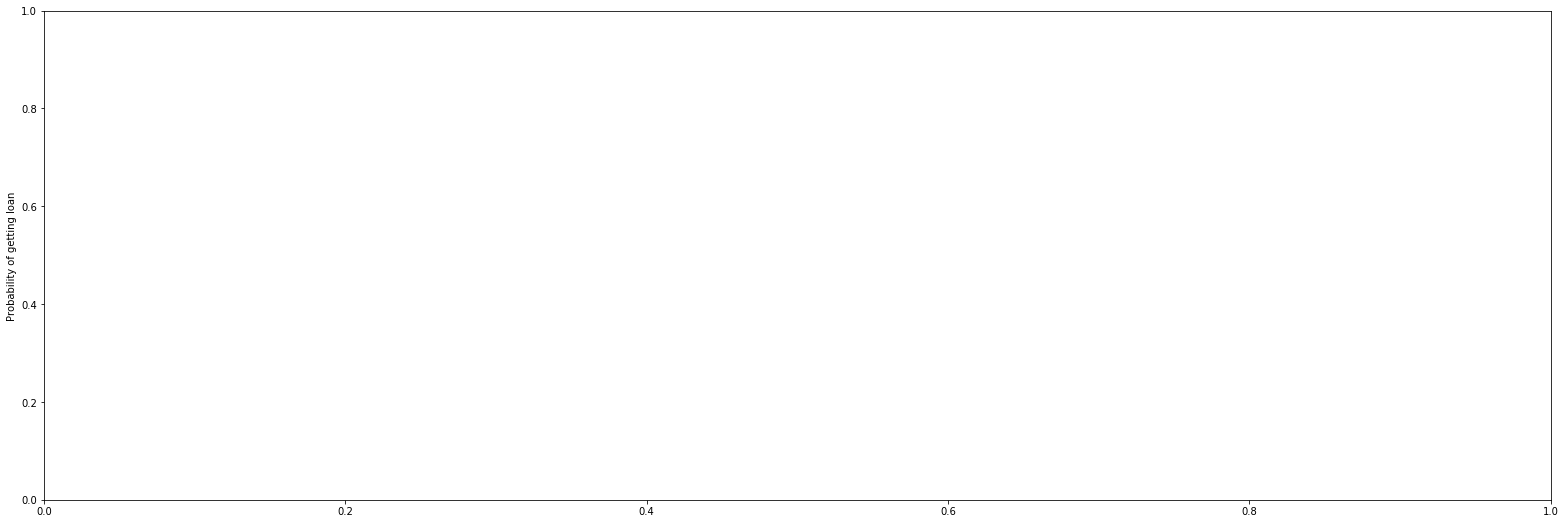

In [123]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(27,9))

temp = data_df.pivot_table(values=['tweet_count'],index=['gender'])
ax = fig.add_subplot(1,1,1) # 1x2 grid on the first subplot
#ax.set_xlabel(feature)
#ax.set_ylabel('Probability of getting loan')
#ax.set_title("Probability by %s" % feature)
temp.plot(kind='bar',ax=ax)

In [175]:
# data_df.pivot_table(values='gender',index=['tweet_count'])

In [103]:
data_df[data_df['_golden'].apply(lambda x : (x==False) )].shape
#pd.DataFrame(data=data_df['_golden'] )

(12858, 26)

In [173]:
def clean(data, categories):
    '''
    Returns cleaned and normalized documents as shown in class.
    '''
    stop = set(stopwords.words('english'))
    exclude = set(string.punctuation) 
    lemma = WordNetLemmatizer()
    cleaned_train_with_category = []
    for doc, target in zip(data, categories):
        stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
        punc_free = ''.join(ch if ch not in exclude else ' ' for ch in stop_free)
        normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
        cleaned_train_with_category.append((normalized.split(),target))
    return cleaned_train_with_category

def count_terms_in_categories(cleaned_train_with_category, categories):
    '''
    for every category, counts the number of times each term has been used,
    uses a dictionary of category-dictionaries
    '''
    # an array with the size of the number of dictionaries, 
    # each dictionary holds a dictionary that maps every term to the number of times it is used
    categories_dictionaries = {}
    # initialize all categories
    for category in categories:
        categories_dictionaries[category] = {}
    for (terms, category) in cleaned_train_with_category:
        for term in terms:
            if term in categories_dictionaries[category]:
                categories_dictionaries[category][term] = categories_dictionaries[category][term] + 1
            else:
                categories_dictionaries[category][term] = 1
    return categories_dictionaries

def order_asc(categories_dictionaries):
    '''
    Using heaps, stores for each category its 10 most used terms
    '''
    top_10_terms = {}
    for category, terms in categories_dictionaries.iteritems():
        heap = [(-value, key) for key,value in terms.items()]
        largest = heapq.nsmallest(10, heap)
        largest = [key for value, key in largest] #[(key, -value) for value, key in largest]
        top_10_terms[category] = largest
    return top_10_terms

In [183]:
cleaned = clean(text_list, gender_list)
terms_with_categories = count_terms_in_categories(cleaned, gender_list)

sorted(terms_with_categories['female'].items(), key = operator.itemgetter(1),reverse=True)
sorted(terms_with_categories['male'].items(), key = operator.itemgetter(1),reverse=True)

[('t', 2321),
 ('co', 2123),
 ('http', 2108),
 ('i', 837),
 ('m', 560),
 ('s', 540),
 ('like', 457),
 ('ù÷', 454),
 ('ù÷â', 390),
 ('get', 378),
 ('one', 362),
 ('day', 362),
 ('love', 348),
 ('go', 305),
 ('make', 300),
 ('time', 287),
 ('people', 249),
 ('want', 225),
 ('know', 222),
 ('u', 221),
 ('new', 208),
 ('amp', 203),
 ('best', 193),
 ('got', 190),
 ('ù', 186),
 ('last', 181),
 ('thing', 180),
 ('need', 174),
 ('back', 172),
 ('can', 170),
 ('good', 169),
 ('see', 164),
 ('ve', 164),
 ('2', 163),
 ('still', 160),
 ('you', 152),
 ('life', 148),
 ('year', 146),
 ('think', 146),
 ('today', 146),
 ('me', 145),
 ('girl', 142),
 ('say', 141),
 ('it', 141),
 ('look', 139),
 ('work', 135),
 ('right', 134),
 ('going', 134),
 ('really', 132),
 ('even', 131),
 ('come', 131),
 ('would', 130),
 ('that', 129),
 ('lol', 128),
 ('friend', 124),
 ('ù\x8f', 121),
 ('take', 120),
 ('much', 119),
 ('always', 118),
 ('way', 117),
 ('never', 116),
 ('feel', 116),
 ('ever', 115),
 ('im', 113),
 ('s